In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/lizhi')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/lizhi


In [ ]:
pip install scikeras #因版本更迭，KerasClassifier需改用scikeras才能實現

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import csv
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
#由於版本更迭，已不適用，現經多用SciKeras，可改用下列code
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = pd.read_csv("train.csv").fillna(0) #將nan取代為0
train_gp_perno = train_data.groupby("PerNo") #相當於索引PerNo標籤，會根據索引分類並排列整齊

train_status_data = train_data[['PerNo','PerStatus']]
train_status_gp_perno = train_status_data.groupby("PerNo")

test_data = pd.read_csv("test.csv").fillna(0).values
#dataframe是可以有title的，而value則是將其轉換為對應numpy的2維數組，如[[1,2],[3,4]]

In [ ]:
train_gp_perno.size()

PerNo
1       4
3       4
6       3
7       1
10      3
       ..
8767    4
8768    1
8769    2
8774    4
8775    1
Length: 4600, dtype: int64

In [ ]:
#perno_data[0]為第一位員工的歷年資料，依此類推
perno_data = [i[1].values for i in train_gp_perno]
#外面一定要有[]，這是列表的生成方式，從train_gp_perno中取i[1]的值並組成一個列表

perno_status = [i[1].values for i in train_status_gp_perno]
#perno_status[0]為第一位員工是否離職的資料，依此類推

#若要檢查 perno_data、perno_status內的內容，可以使用以下程式碼
#print(perno_data[0].astype(int))
#print(perno_status[0].astype(int))

In [ ]:
#print(perno_data[0].astype(int))
#train_data.values[0].astype(int)
#不用train_data.values[0].astype(int)完成上個儲存格的事，
#是因為我想要的是perno_data[0]是PerNo1的所有資料，perno_data[1]是PerNo3的所有資料

In [ ]:
"""
此處為手動資料處裡部分
每位員工有好幾年的資料，我將其壓縮並整理成一個員工只有一份資料，方便訓練模組
"""


all_employee_data = []
for i in range(len(perno_data)):      # run all perno_data

  A5l= []
  A13l= []
  A16l= []
  A18l= []
  A19l= []
  A20l= []
  A22l= []
  A25l= []
  A26l= []
  A27l= []
  A28l= []
  A29l= []
  A30l= []
  A31l= []
  A37l= []
  A38l= []
  A39l= []
  A40l= []


  for j in perno_data[i]:    # run all array in perno_data
    A5l.append(j[5])   #職等
    A13l.append(j[12])  #專案時數
    A16l.append(j[16])  #工作地點
    A18l.append(j[18])
    A19l.append(j[19])
    A20l.append(j[20])
    A22l.append(j[22])
    A25l.append(j[25])
    A26l.append(j[26])
    A27l.append(j[27])
    A28l.append(j[28])
    A29l.append(j[29])
    A30l.append(j[30])
    A31l.append(j[31])
    A37l.append(j[37])
    A38l.append(j[38])
    A39l.append(j[39])
    A40l.append(j[40])

  A1 = perno_data[i][0][1]   #PerNo
  A2 = perno_data[i][-1][2]   #PerStatus
  A3 = perno_data[i][0][3]   #sex
  A4 = perno_data[i][-1][4]  #工作分類
  A5 = np.median(A5l)   #職等
  A6 = perno_data[i][-1][6]  #廠區代碼
  A7 = perno_data[i][-1][7]-perno_data[i][0][7]   #管理層級
  A8 = perno_data[i][-1][8]      #工作資歷1
  A9 = perno_data[i][-1][9]      #工作資歷2
  A10 = perno_data[i][-1][10]      #工作資歷3
  A11 = perno_data[i][-1][11]      #工作資歷4
  A12 = perno_data[i][-1][12]      #工作資歷5
  A13 = np.median(A13l)
  A14 = perno_data[i][-1][14]   #專案總數
  A15 = perno_data[i][-1][15]   #當前專案
  A16 = np.mean(A16l)     #特殊專案
  A17 = perno_data[i][-1][17]   #工作地點
  A18 = np.mean(A18l)       #訓練時數
  A19 = np.mean(A19l)
  A20 = np.mean(A20l)
  A21 = perno_data[i][-1][21]   #生產總額
  A22 = np.mean(A22l)       #榮譽數
  A23 = perno_data[i][-1][23]    #是否升遷
  A24 = perno_data[i][-1][24]-perno_data[i][0][24]   #升遷速度
  A25 = np.mean(A25l)   #請假
  A26 = np.mean(A26l)
  A27 = np.mean(A27l)
  A28 = np.mean(A28l)
  A29 = np.mean(A29l)   #出差
  A30 = np.mean(A30l)
  A31 = np.mean(A31l)
  A32 = perno_data[i][-1][32]   #年度績效
  A33 = perno_data[i][-1][33]
  A34 = perno_data[i][-1][34]
  A35 = perno_data[i][-1][35]   #年齡
  A36 = perno_data[i][-1][36]   #婚姻
  A37 = np.mean(A37l)
  A38 = np.mean(A38l)
  A39 = np.mean(A39l)
  A40 = np.mean(A40l)
  A41 = perno_data[i][-1][41]
  A42 = perno_data[i][-1][42]
  A43 = perno_data[i][-1][43]
  A44 = perno_data[i][-1][44]
  A45 = perno_data[i][-1][45]
  A46 = perno_data[i][-1][46]

  employee_data = [A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46]
  all_employee_data.append(employee_data)
all_employee_data = np.array(all_employee_data)

In [ ]:
print(len(employee_data)) #45維的資料
print(len(all_employee_data)) #總共4600個PerNo，也就是說4600條train資料

45
4600


In [ ]:
perno_termination = np.array([item[-1][1] for item in perno_status])
#perno_termination[0]，則為第一位員工最後是否有離職，有的話是1

In [ ]:
sc = StandardScaler()  # 初始化標準化器
x_train = sc.fit_transform(all_employee_data)  # 對訓練數據進行標準化
x_test = sc.fit_transform(test_data)  # 對測試數據進行標準化
y_train = perno_termination  # 設置訓練目標變量

In [ ]:
def create_model(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']):
#設定基本參數，目的是方便後續修改optimizer、loss、metrics
    model = Sequential([
        Dense(512, activation='relu', input_dim=45),
        #使用全連接層，神經元為512、激活函數為relu，需預定初始維度(此處為45)
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics) #編譯模型
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
#在使用 Scikit-learn 的 GridSearchCV 時，必須使用 Scikit-learn 的估算器，
#Keras 的模型並不是 Scikit-learn 兼容的估算器，
#因此需要將 Keras 模型包裝成 Scikit-learn 兼容的形式，
#KerasClassifier 正是專門用於將 Keras 模型包裝成 Scikit-learn 兼容的估算器。

params = {'batch_size':[32,64,128,256],
      'epochs':[5,10],
      'optimizer':['adam','rmsprop','Nadam']}
#以字典的方式，讓GridSearchCV在指定的項目內找出最佳參數

In [ ]:
grid_search = GridSearchCV(estimator=model,  # 初始化 GridSearchCV 物件，使用模型 model 作為估算器
                param_grid=params,  # 設置要搜索的參數網格
                scoring="accuracy",  # 使用 accuracy 作為評分標準
                cv=2,  # 設置交叉驗證的折數為 2
                verbose=0  # 設置為不顯示詳細信息
                ).fit(x_train, y_train)  # 執行 GridSearchCV，並進行模型訓練
#明明設定verbose=0，但底下還是有一堆訊息
#是因為那是keras本身的日誌消息，可以關，但要去設置python的日誌級別

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [ ]:
best_param = grid_search.best_params_  # 獲取 GridSearchCV 找到的最佳參數
best_accuracy = grid_search.best_score_  # 獲取 GridSearchCV 找到的最佳準確度
print(best_param)
print(best_accuracy)

{'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
0.8358695652173913


In [ ]:
classifier = create_model(optimizer='adam')
history = classifier.fit(x_train,y_train,
        batch_size=256,
        epochs=10,
        shuffle=True,
        validation_split=0.1
)

Epoch 1/10
17/17 [==============================] - 1s 17ms/step - loss: 0.4947 - accuracy: 0.7913 - val_loss: 0.3776 - val_accuracy: 0.8543
Epoch 2/10
17/17 [==============================] - 0s 8ms/step - loss: 0.4138 - accuracy: 0.8355 - val_loss: 0.3621 - val_accuracy: 0.8500
Epoch 3/10
17/17 [==============================] - 0s 7ms/step - loss: 0.3935 - accuracy: 0.8326 - val_loss: 0.3571 - val_accuracy: 0.8565
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3779 - accuracy: 0.8440 - val_loss: 0.3526 - val_accuracy: 0.8543
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3652 - accuracy: 0.8505 - val_loss: 0.3516 - val_accuracy: 0.8457
Epoch 6/10
17/17 [==============================] - 0s 9ms/step - loss: 0.3509 - accuracy: 0.8556 - val_loss: 0.3486 - val_accuracy: 0.8522
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.8592 - val_loss: 0.3485 - val_accuracy: 0.8587
Epoch 8/10
17/17 [=

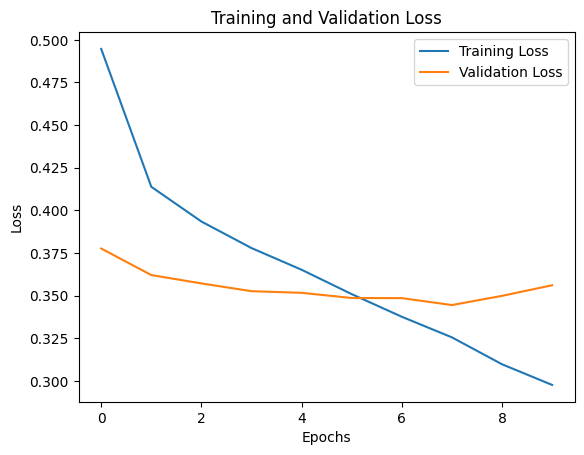

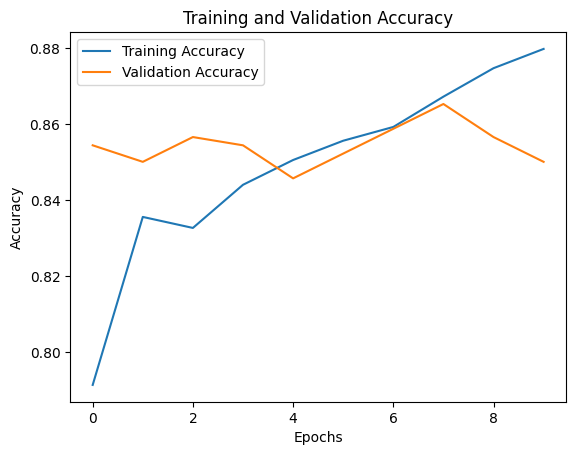

In [ ]:
#繪製訓練集和驗證集的損失值
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#繪製訓練集和驗證集的準確率
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predicted_labels = classifier.predict(np.delete(x_test, [0, 2], axis=1))
# 用刪除了"年份"及"是否離職"的test資料去做預測，刪除年份的理由是，上面經過人工的資料處理後，把年份資料給移除了
predicted_binary = (predicted_labels > 0.4)
print(f'predicted_binary的shape:{predicted_binary.shape}')

# 計算 True 的個數
true_indices = np.where(predicted_binary == True)
true_count = len(true_indices[0])
print("True 的個數：", true_count)

117/117 [==============================] - 0s 1ms/step
predicted_binary的shape:(3739, 1)
True 的個數： 622


In [ ]:
with open('submission.csv', 'w', newline='') as csvfile:
    '''
    開啟csv檔時，換行符號可固定為 newline=''
    因為csv模組有自己的統一換行處理方式，
    若沒有設定 newline=''　那python的自動填入可能會填入額外的 /r
    '''

    writer = csv.writer(csvfile)

    # 寫入 CSV 文件的標題行
    writer.writerow(["PerNo", "PerStatus"])

    #進行迴圈迭代
    for i, prediction in enumerate(predicted_binary):
        # enumerate()，他會給予list的值各自的索引 ( list[0]的index為0 )

        t = 1 if prediction[0] else 0
        # 將 True 轉換為 1，將 False 轉換為 0

        writer.writerow([test_data[i][1], t])
        # 寫入每一行的數據